In [177]:
import warnings
warnings.filterwarnings('ignore')

In [178]:
#Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

# Reading dataset and Inspecting data:

In [179]:
#Reading the dataset
bikeSharing_df = pd.read_csv(r'C:\Users\nEW u\Desktop\Linear Regression Assignment\day.csv')

In [180]:
#Inspecting the first five rows
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [181]:
#Inspecting the shape
bikeSharing_df.shape

(730, 16)

In [182]:
#Check dataset for null values and datatypes
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [183]:
#Checking the details of numerical data
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [184]:
#Checking the columns
bikeSharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [185]:
#Checking the size of data
bikeSharing_df.size

11680

In [186]:
#Checking the datatypes of data
bikeSharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [187]:
#Checking the axes of data
bikeSharing_df.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [188]:
#Checking the dimensions of data
bikeSharing_df.ndim

2

In [189]:
#Checking the values of data
bikeSharing_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [190]:
#Hence, we can conclude that there are 730 rows and 16 columns in the dataset. Also, that there are no null values in any columns.

# Cleaning data:

In [191]:
#Before dropping date, let us introduce a days_old variable which indicates how old the business is
bikeSharing_df['days_old'] = (pd.to_datetime(bikeSharing_df['dteday'],format = '%d-%m-%Y') - pd.to_datetime('01-01-2018' ,format = '%d-%m-%Y')).dt.days

In [192]:
#Inspect once
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [193]:
#dropping instant column as it is index column which has nothing to do with the target
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)

In [194]:
#Dropping dteday as we already have month and weekday column to work with
bikeSharing_df.drop(['dteday'], axis = 1, inplace = True)

In [195]:
#Dropping casual and registered column as we already have cnt which is the sum of both for the target variable
bikeSharing_df.drop(['casual'], axis = 1, inplace = True)

In [196]:
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)

In [197]:
#Inspecting dataframe after dropping
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [198]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
days_old      730 non-null int64
dtypes: float64(4), int64(9)
memory usage: 74.2 KB


In [199]:
bikeSharing_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [200]:
bikeSharing_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [201]:
bikeSharing_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


In [202]:
#We can see that some features like season, weathersit, weekdays and month are integers where they should be non-numerical categories.

# Handling missing values:

In [203]:
#Printing null counts by columns
bikeSharing_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

# Handling outliers:

In [204]:
#Handle outliers
bikeSharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [205]:
#Print number of unique values in all columns
bikeSharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

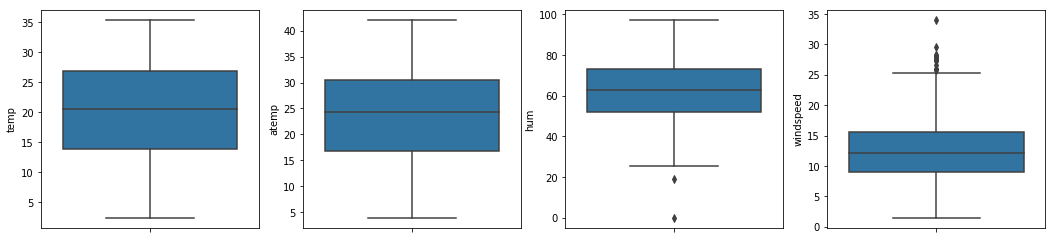

In [206]:
#Drawing box plots for independent variables with continous values

cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize = (18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

In [207]:
#From the above plots, we can infer that there are no outliers.

# EDA:

In [208]:
#Converting season and weathersit to categorical types

bikeSharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)
bikeSharing_df.weathersit.replace({1:"good", 2:"moderate", 3:"bad", 4:"severe"}, inplace = True)
bikeSharing_df.mnth = bikeSharing_df.mnth.replace({1:"jan", 2:"feb", 3:"mar", 4:"apr", 5:"may", 6:"jun", 7:"jul", 8:"aug", 9:"sept", 10:"oct", 11:"nov", 12:"dec"})
bikeSharing_df.weekday = bikeSharing_df.weekday.replace({0:"sun", 1:"mon", 2:"tue", 3:"wed", 4:"thu", 5:"fri", 6:"sat"})
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


In [209]:
#Drawing Pairplots to check the linear relationship

<Figure size 1080x2160 with 0 Axes>

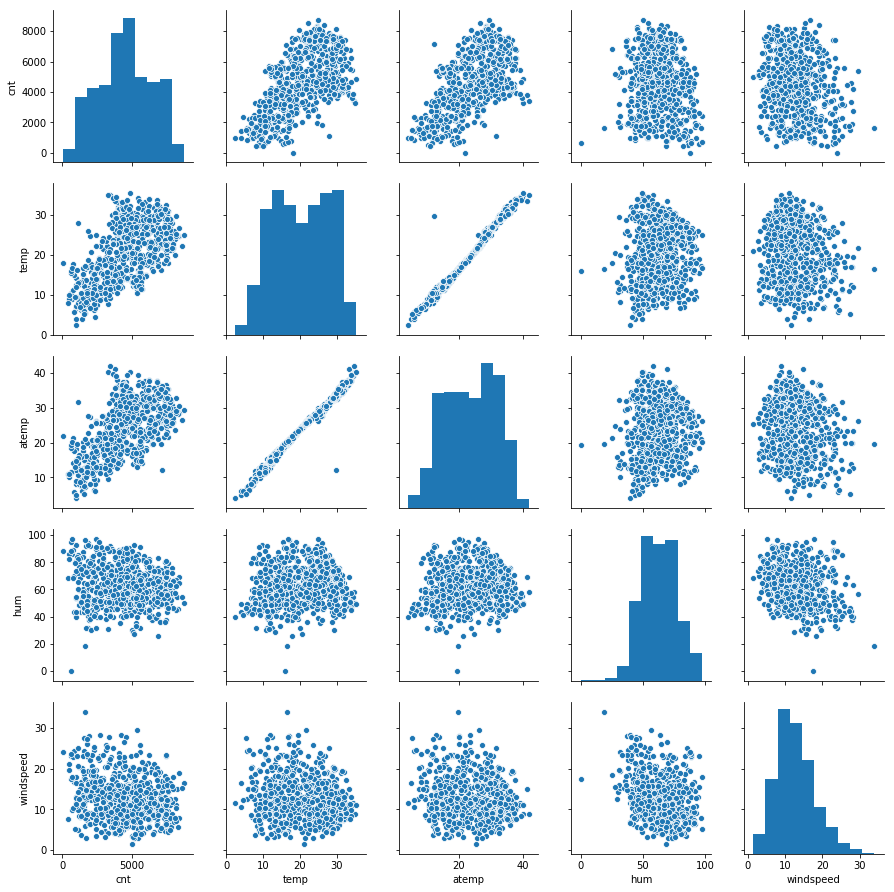

In [210]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_df, vars=['cnt', 'temp', 'atemp', 'hum', 'windspeed'])
plt.show()

In [211]:
#As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp.

<Figure size 1440x1080 with 0 Axes>

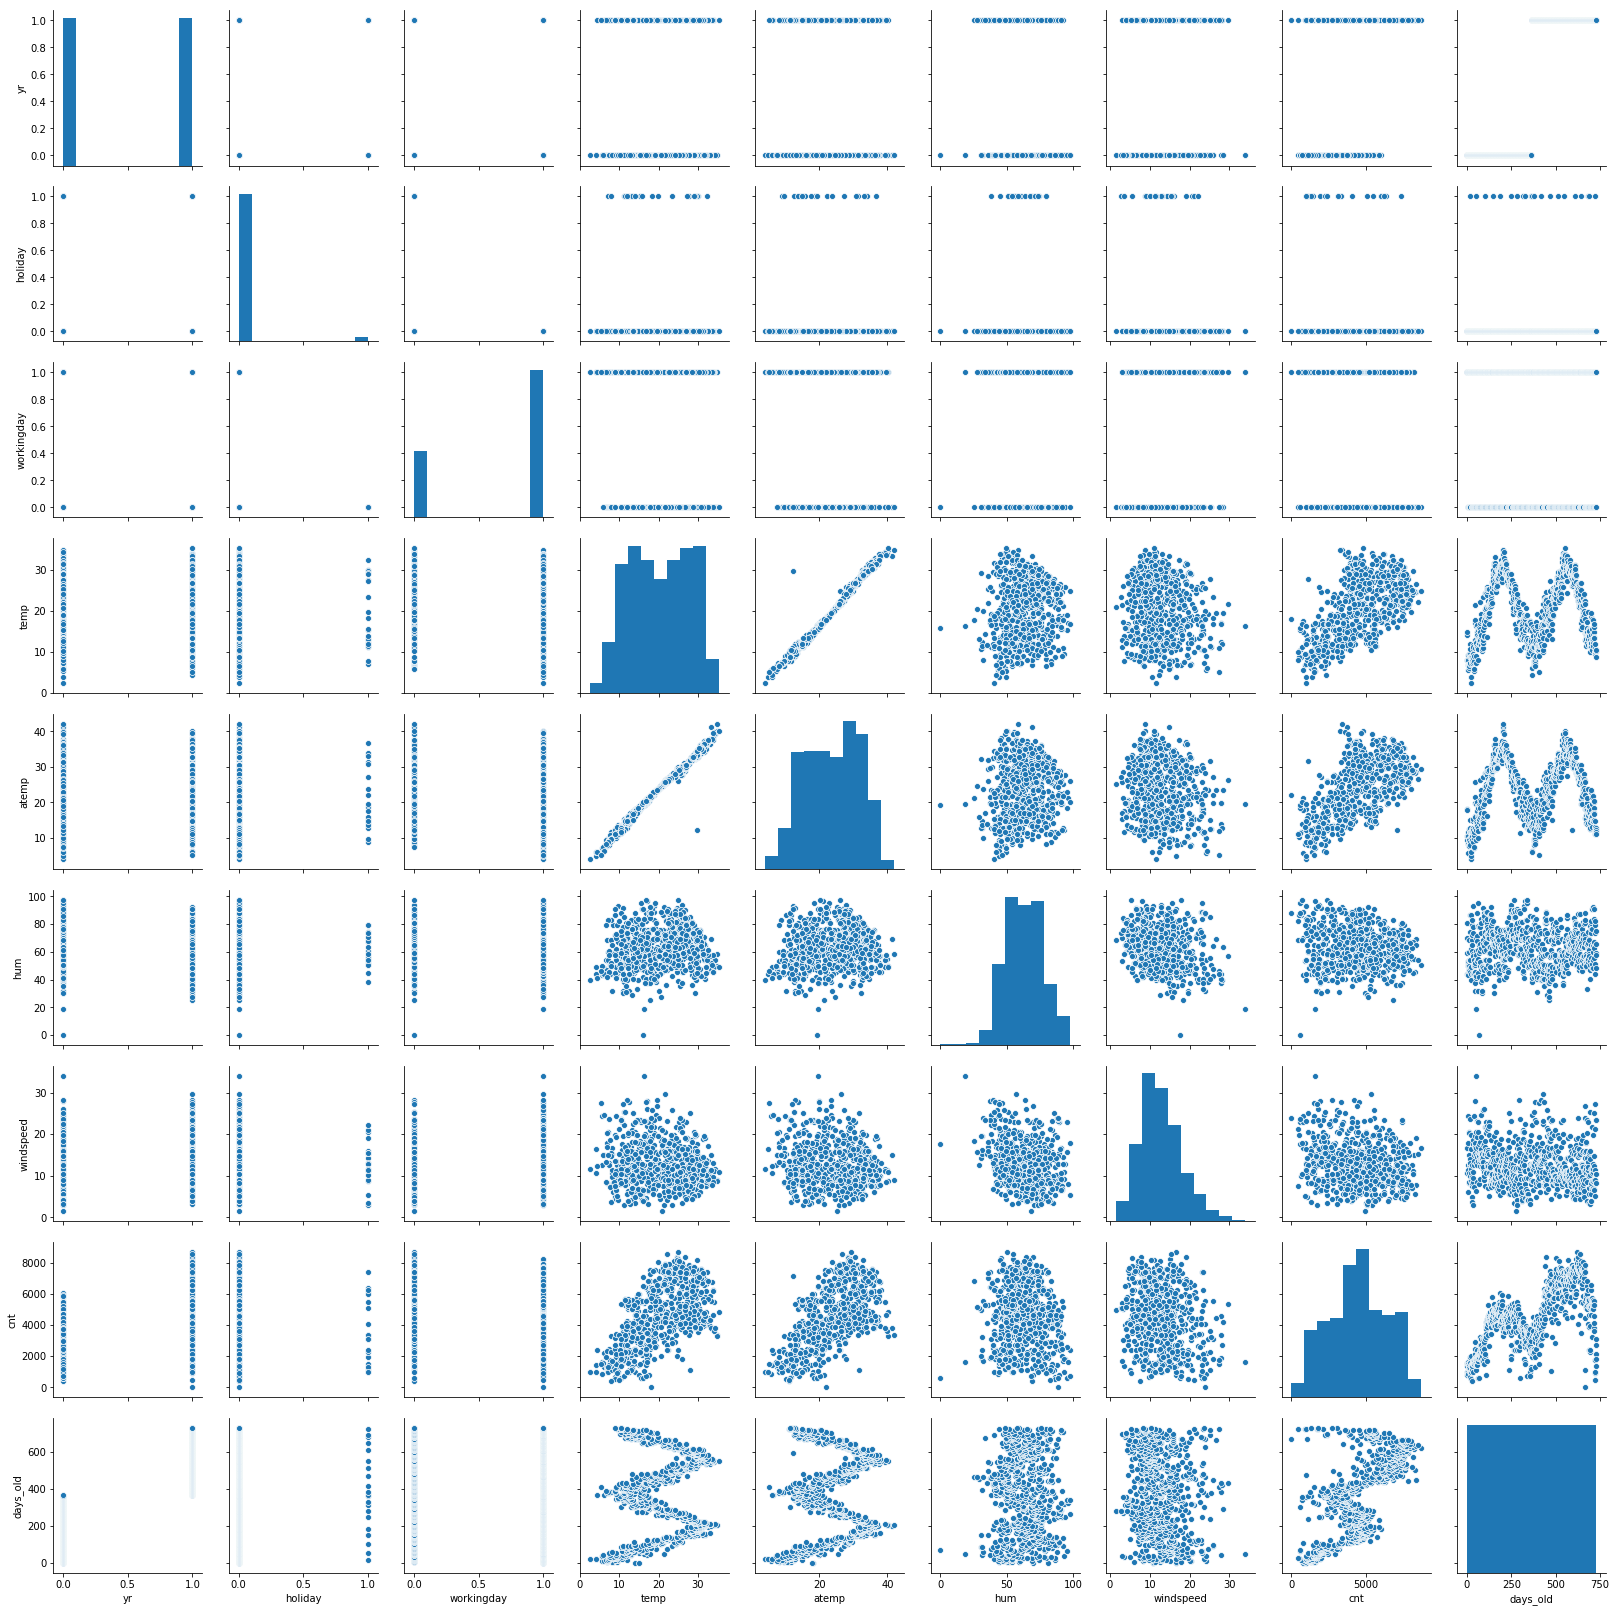

In [212]:
#Visualizing the data to find the correlation between the numerical variable

plt.figure(figsize=(20,15))
sns.pairplot(bikeSharing_df)
plt.show()

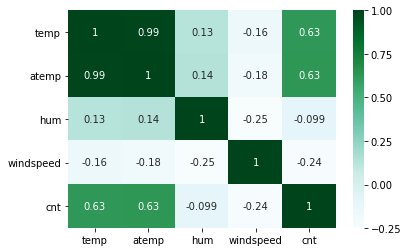

In [213]:
#Checking continous variable relationship with each other

sns.heatmap(bikeSharing_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), cmap='BuGn', annot=True)
plt.show()

Here we see that temp and atemp has a correlation more than .99 meaning almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only.

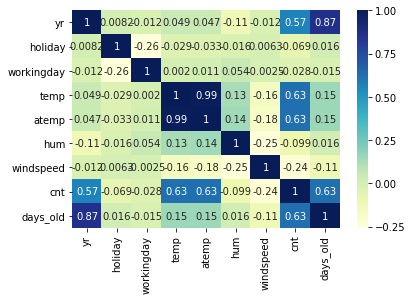

In [214]:
#Correlation for numeric variables

cor=bikeSharing_df.corr()
sns.heatmap(cor, cmap='YlGnBu', annot = True)
plt.show()

### Drawing heatmap of correlation between variables:

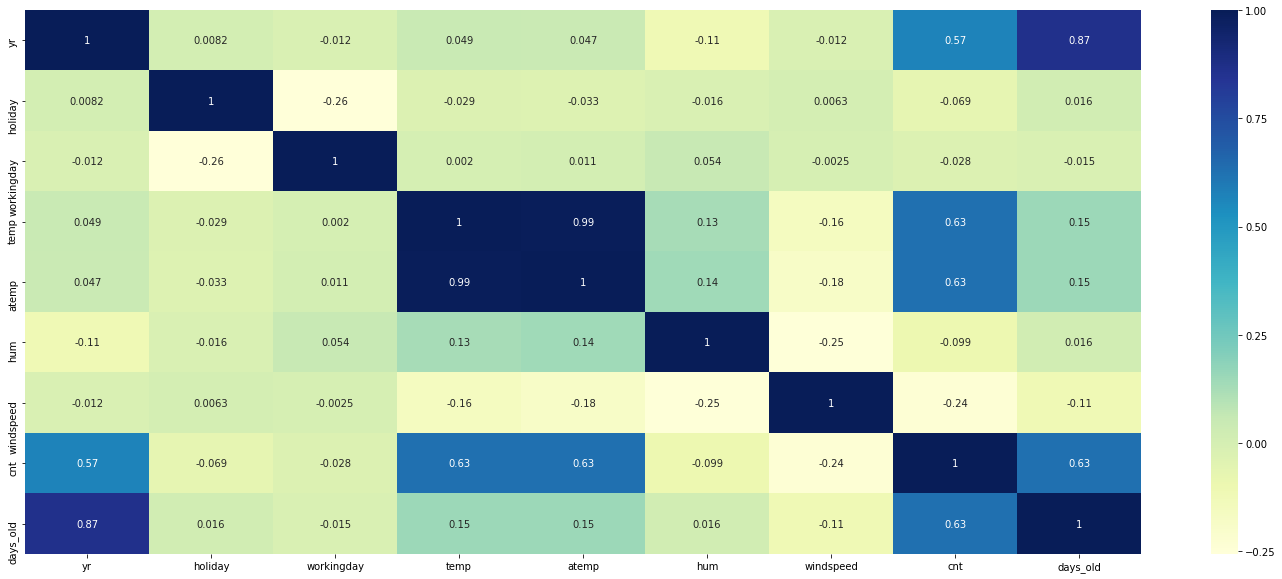

In [215]:
#Calculate Correlation

corr = bikeSharing_df.corr()
plt.figure(figsize=(25,10))

#Draw heatmap for correlation

sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.show()

In [216]:
##From the correlation map, temp, atemp, and days_old seems to be highly correlated and only variable can be considered for the model. However, let us eliminate it based on the Varianvce Inflation Factor later during the model building.

##We also see target variable has a linear relationship with some of the independent variables. A good sign for building a linear regression model.

#### Analyzing categorical variables with target variables

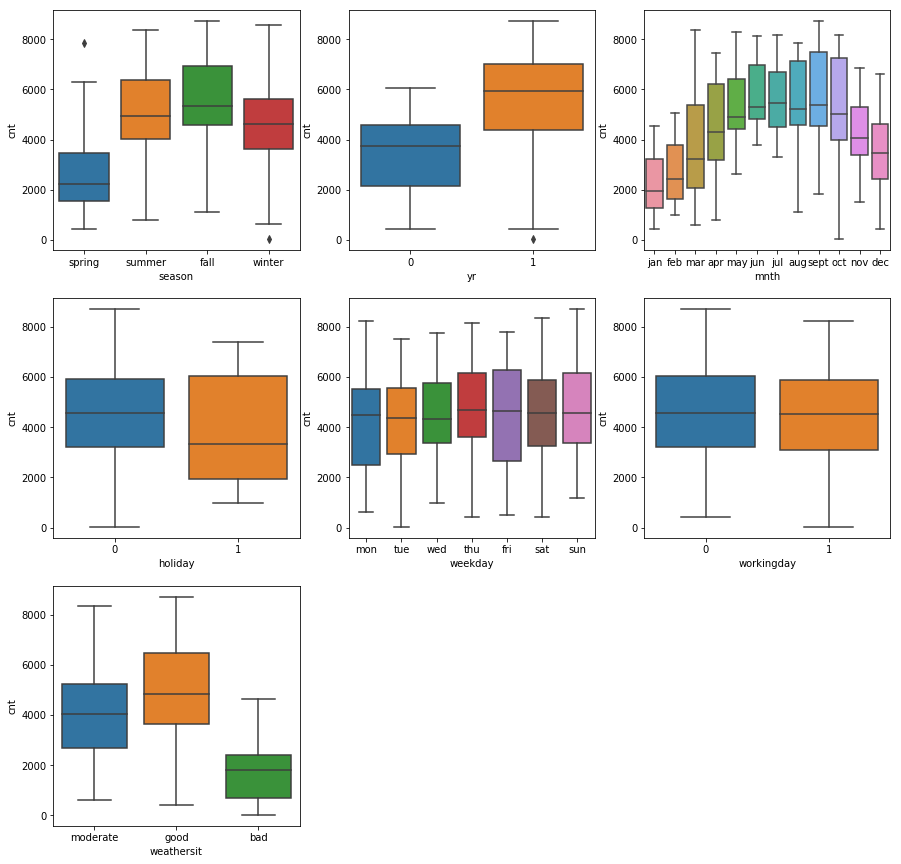

In [217]:
#Boxplot for categorical variables to see demands

vars_cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(15,15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.show()

# Inferences:

1. Fall season has highest demand for rental bikes
2. Appears like the demand for next year has grown
3. Demand is continously growing for every month till June, September has the highest demand. After September, demand has decreased
4. Demand decreases when there is a holiday
5. Demand for weekdays is not clear
6. The clear weathershit has the highest demand
7. During September, bike sharing is more. During the year end and the beginning, demand is less. It could be due to the extreme weather conditions.

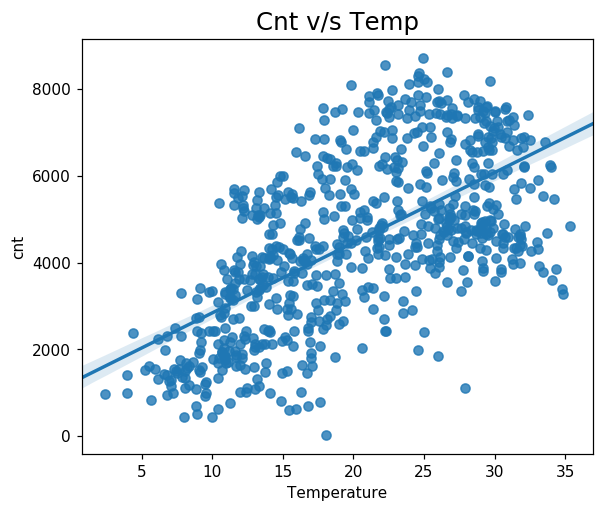

In [218]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt v/s Temp", fontsize=16)
sns.regplot(data=bikeSharing_df, y="cnt", x="temp")
plt.xlabel("Temperature")
plt.show()

# Inferences:

1. Demand for bikes is positively correlated to temp
2. We can see that cnt is linearly increasing with temp indicating linear relation

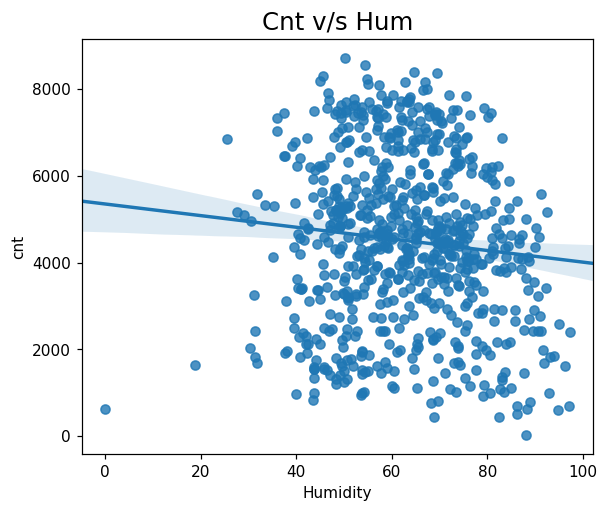

In [219]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt v/s Hum", fontsize=16)
sns.regplot(data=bikeSharing_df, y="cnt", x="hum")
plt.xlabel("Humidity")
plt.show()

# Inferences:

1. Humidity values are more scattered around
2. Although we can see cnt decreasing with increase in humidity

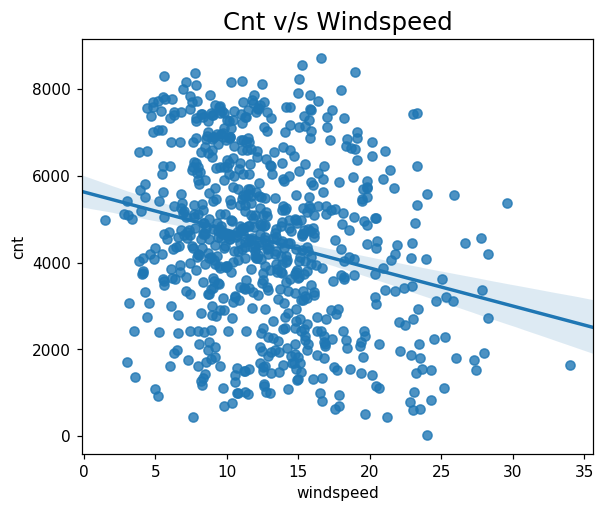

In [220]:
plt.figure(figsize=(6,5), dpi=110)
plt.title("Cnt v/s Windspeed", fontsize=16)
sns.regplot(data=bikeSharing_df, y="cnt", x="windspeed")
plt.show()

# Inferences:

1. Windspeed values are more scattered around
2. Although we can see cnt decreasing with increase in windspeed

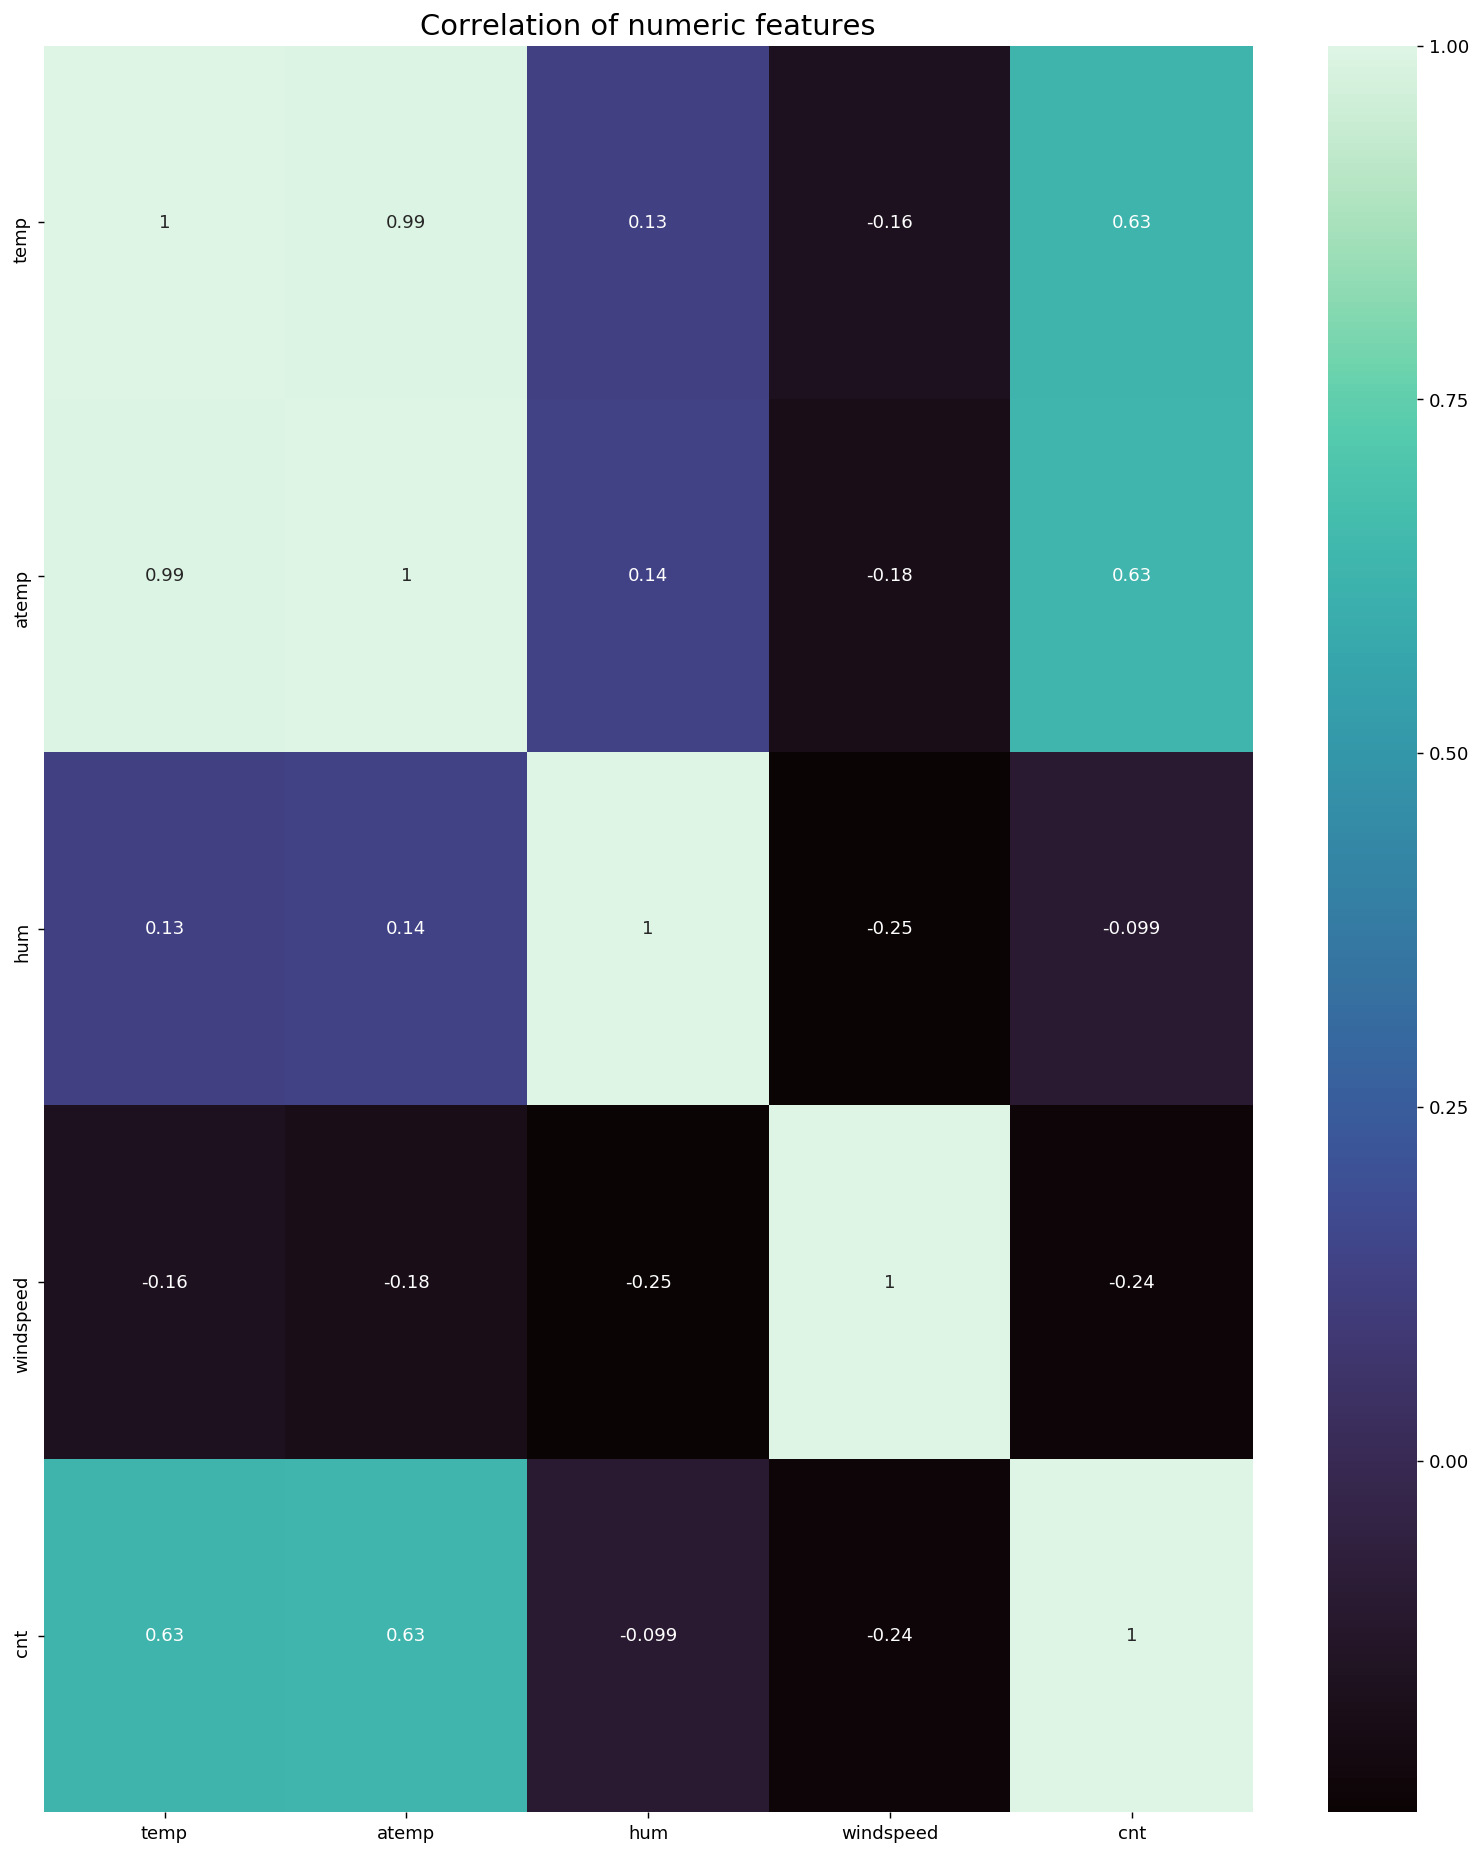

In [221]:
num_features = ["temp", "atemp", "hum", "windspeed", "cnt"]
plt.figure(figsize=(15,18), dpi=130)
plt.title("Correlation of numeric features", fontsize=16)
sns.heatmap(bikeSharing_df[num_features].corr(), annot=True, cmap="mako")
plt.show()

# Inferences:

1. temp and atemp are highly correlated. So we can remove either one of them but for now let's keep tem for further analysis
2. temp and atemp also have high correlation with cnt variable

In [222]:
bikeSharing_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


# Data preparation for Linear Regression:

In [223]:
#Creating dummy variables for all categorical variables

bikeSharing_df = pd.get_dummies(data=bikeSharing_df, columns=["season", "mnth", "weekday"], drop_first=True)
bikeSharing_df = pd.get_dummies(data=bikeSharing_df, columns=["weathersit"])

1. Dropping the first column as (p-1) dummies can explain p categories.
2. In weathersit first column was not dropped so as to not lose the information about severe weather situation

In [224]:
#Print columns after creating dummies
bikeSharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [225]:
#Printing first five rows to inspect
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


# Model Building:

## Splitting data into training and test

In [226]:
#Checking shape before splitting
bikeSharing_df.shape

(730, 32)

In [227]:
#X is all remaining variable and our independent variable
X = bikeSharing_df

#Train test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [228]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


In [229]:
#Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 32)
(219, 32)


# Feature scaling continous variables:

To make all features in same scale to interpret easily.

Following columns are continous to be scaled temp, hum and windspeed.

In [230]:
#Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [231]:
#Let us scale continous variables
num_vars = ["temp", "atemp", "hum", "windspeed", "days_old"]

#Use normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [232]:
#Inspect stats from Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,4552.951076,0.512409,0.230920,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,1938.435496,0.292268,0.421834,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,431.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,3288.500000,0.254458,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,4590.000000,0.521262,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,6037.500000,0.770233,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [233]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,5445,0.936900,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,5478,0.884774,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,5020,0.223594,0,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1162,0.493827,1,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,7572,0.877915,0,...,0,0,0,0,1,0,0,0,0,1


# Build a model using RFE and Automated approach

## Use RFE to eliminate some columns

In [234]:
#Build a linear regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [235]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr, 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=15, step=1, verbose=0)

In [236]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 7),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('cnt', True, 1),
 ('days_old', True, 1),
 ('season_spring', False, 18),
 ('season_summer', False, 9),
 ('season_winter', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 3),
 ('mnth_jul', False, 13),
 ('mnth_jun', False, 6),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 10),
 ('mnth_nov', False, 2),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 4),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 8),
 ('weekday_thu', True, 1),
 ('weekday_tue', False, 16),
 ('weekday_wed', True, 1),
 ('weathersit_bad', False, 17),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

# Manual elimination

## Function to build a model using statsmodel api

In [237]:
#Function to build a model using statsmodel api - takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [238]:
#Function to calculate VIFs and print them - Take the columns for which VIF is to be calculated as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by = 'VIF', ascending = False))

In [239]:
#Print columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['holiday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old',
       'season_winter', 'mnth_dec', 'mnth_oct', 'mnth_sept', 'weekday_thu',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [240]:
#Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['yr', 'workingday', 'season_spring', 'season_summer', 'mnth_aug',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_tue',
       'weathersit_bad'],
      dtype='object')

In [241]:
#Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']]

In [242]:
X_train_rfe.shape

(511, 15)

# Build Model:

## Model 1 - Starting with all variables selected by RFE

In [243]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.70e-181
Time:                        14:42:21   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

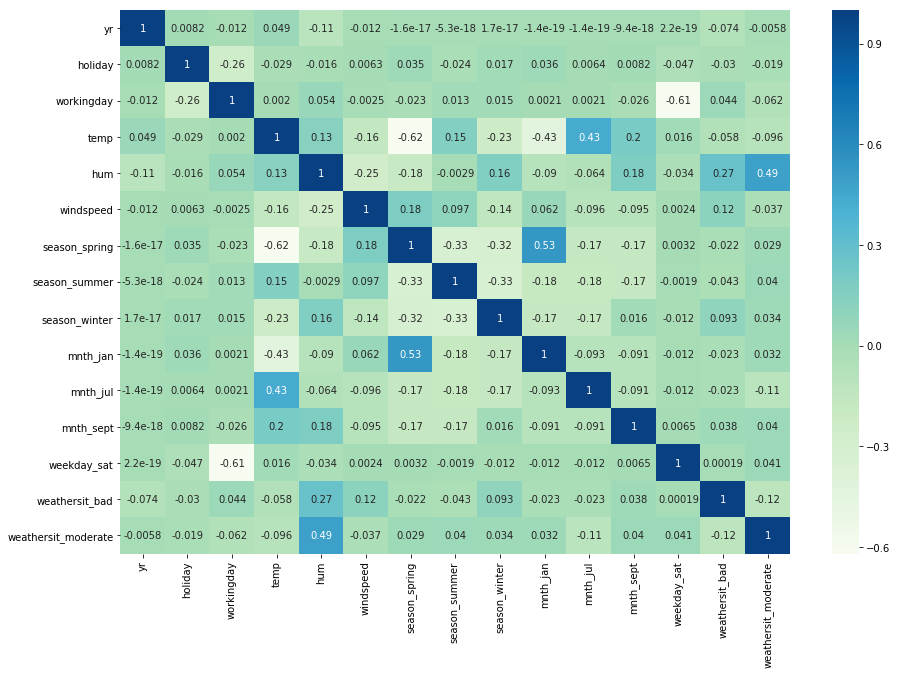

In [244]:
#Checking correlation of features selected by RFE with target column
#Also to check impact of different features on target
plt.figure(figsize=(15,10))
sns.heatmap(bikeSharing_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot = True)
plt.show()

## Model 2

In [245]:
#Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.35e-182
Time:                        14:42:28   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

## Model 3

All the columns have p-value > .05 hence, checking VIFs

In [246]:
#Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          3.37e-180
Time:                        14:42:31   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2004.0762    

## Model 4

In [247]:
#Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.51e-178
Time:                        14:42:33   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1845.8415    

## Model 5

In [248]:
#Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          8.20e-179
Time:                        14:42:37   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1779.2943    

## Model 6

In [249]:
#Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     156.8
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          4.14e-147
Time:                        14:42:41   Log-Likelihood:                -4229.9
No. Observations:                 511   AIC:                             8482.
Df Residuals:                     500   BIC:                             8528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5070.0855    

## Model 7

In [250]:
#Trying to replace July with spring as both were highly correlated
cols = ['yr', 'workingday', 'windspeed', 'mnth_jul', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.84e-92
Time:                        14:42:44   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3428.8800    

## Model 8

In [251]:
#Trying to replace July with Spring as both were highly correlated
cols = ['yr', 'workingday', 'windspeed', 'mnth_jul', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.84e-92
Time:                        14:42:46   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3428.8800    

## Model 9

In [252]:
#Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     148.1
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.75e-142
Time:                        14:42:50   Log-Likelihood:                -4240.9
No. Observations:                 511   AIC:                             8504.
Df Residuals:                     500   BIC:                             8550.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4618.6083    

## Model 10

In [253]:
#Using the weekend "Sunday" which was dropped during RFE instead of Saturday
cols = ['yr', 'workingday', 'season_spring', 'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sun', 'weathersit_moderate', 'weathersit_bad']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          3.20e-142
Time:                        14:42:52   Log-Likelihood:                -4241.5
No. Observations:                 511   AIC:                             8505.
Df Residuals:                     500   BIC:                             8552.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4681.2816    

## Model 11

In [254]:
#Adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul', 'season_winter', 'mnth_sept', 'weekday_sun', 'temp', 'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          9.73e-178
Time:                        14:42:55   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

# Inferences:

Here VIF seems to be almost accepted. P-value for all the features is almost 0.0 and R2 is 0.821
Let us select Model 11 as our final as it as all the important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi collinear (high VIF) variables. Difference between R-squared and adjusted R-squared values for this model is very less, which also means that there are no additional parameters that can be removed from this model.

In [255]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [256]:
#Building the final model using sklearn
cols = ['yr', 'season_spring', 'mnth_jul', 'season_winter', 'mnth_sept', 'weekday_sun', 'weathersit_bad', 'weathersit_moderate', 'temp']

#Building a column with above columns
lr = build_model_sk(X_train[cols], y_train)
print(lr.intercept_, lr.coef_)

1740.73724401643 [ 1994.67955569 -1167.70089558  -514.63181313   496.75430396
   465.92729708   190.37518346 -2256.10482681  -662.38986442
  3984.25555511]


# Model Evaluation:

## Residual analysis

In [257]:
y_train_pred = lr.predict(X_train[cols])

In [258]:
#Plotting a histogram for the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

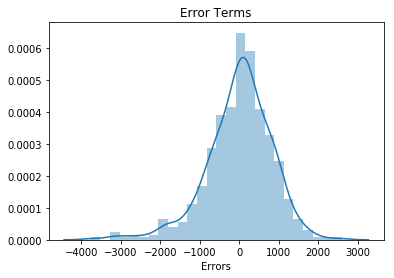

In [259]:
plot_res_dist(y_train, y_train_pred)

Errors are normally distributed here with mean as 0, hence everything looks fine.

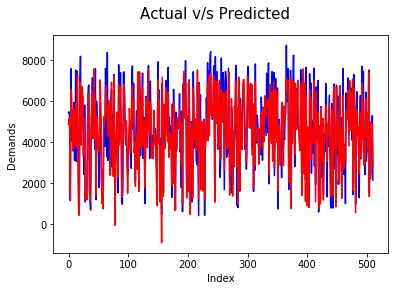

In [260]:
#Actual v/s Predicted
c = [i for i in range(0, len(X_train), 1)]
plt.plot(c, y_train, color='blue')
plt.plot(c, y_train_pred, color='red')
plt.suptitle('Actual v/s Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result follow almost the same pattern so this model seems okay.

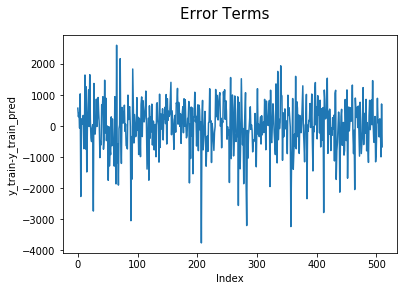

In [261]:
#Error Terms
c = [i for i in range(0, len(X_train), 1)]
plt.plot(c, y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize=15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Here, we can see that the error terms are independent of each other.

In [262]:
#Print R-squared value:
r2_score(y_train, y_train_pred)

0.8158045196281631

# Inference

## R2 is same as our final model

## Linearity Check

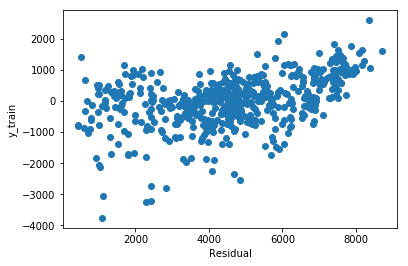

In [263]:
#Scatter plot for the check
residual = (y_train-y_train_pred)
plt.scatter(y_train, residual)
plt.ylabel('y_train')
plt.xlabel('Residual')
plt.show()

## Predict values for test data set

In [264]:
#Scale variables in X_test
num_vars=['temp', 'atemp', 'hum', 'windspeed', 'days_old']

#Test data to be transformed only, no fitting
X_test[num_vars]=scaler.transform(X_test[num_vars])

In [265]:
#Columns from our final model
ols = ['yr', 'season_spring', 'mnt_jul', 'season_winter', 'mnth_sept', 'weekday_sun', 'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

## R-Squared value for test predictions

In [266]:
#Find out the R-squared value between test and predicted test data sets
r2_score(y_test, y_test_pred)

0.8127228702995221

## Homoscedacity

### Inference

R2 value for predictions on test data (0.812) is almost same as R2 value of train data (0.815). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data).

Text(0, 0.5, 'y_test_pred')

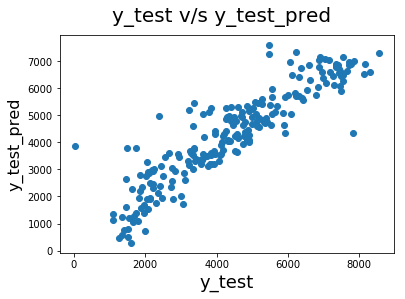

In [267]:
#Plotting y_test and y_test_pred to understand the spread
fig=plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test v/s y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)

# Inference

We can observe that variance of the residuals (error terms) is constant across predictions. i.e. error term does not vary much as the value of the predictor value changes.

### Plot test v/s Predicted test values

In [268]:
#Function to plot Actual vs Predicted
#Takes actual and predicted values as input along with the scale and title to indicate which data

def plot_act_pred(act, pred, scale, dataname):
    c = [i for i in range (1, scale, 1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c, act, color='blue', linewidth=2.5, linestyle="-")
    plt.plot(c, pred, color='red', linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)
    plt.xlabel('Index', fontsize=18)
    plt.ylabel('Counts', fontsize=16)

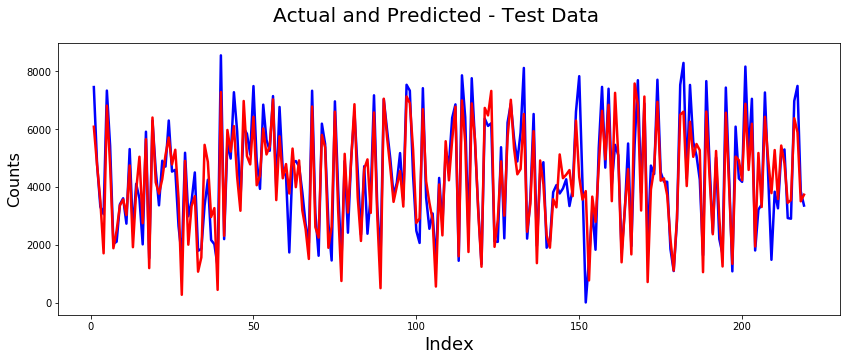

In [269]:
#Plot Actual v/s Predicted for test data
plot_act_pred(y_test, y_test_pred, len(y_test)+1, 'Test Data')

### Inference:

As we can see, predictions for test data is very close to the actual data

## Plot Error Terms for test data

In [270]:
#Error terms
def plot_err_terms(act, pred):
    c = [i for i in range(1, 220, 1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c, act-pred, color='blue', marker='o', linewidth=2.5, linestyle='')
    fig.suptitle('Error Terms', fontsize=20)
    plt.xlabel('Index', fontsize=18)
    plt.ylabel('Counts - Predicted Counts', fontsize=16)

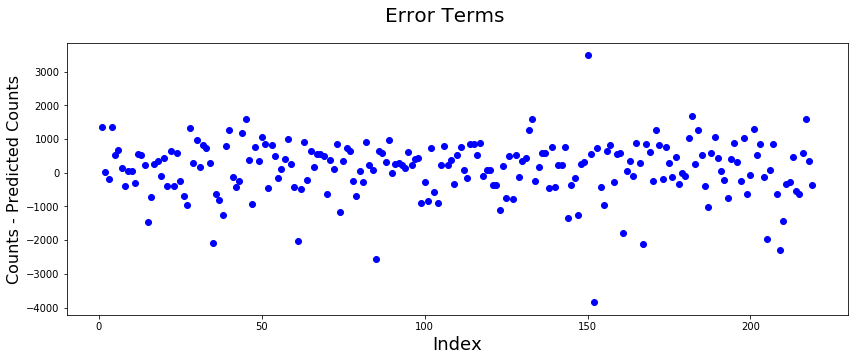

In [271]:
#Plot error terms for test data
plot_err_terms(y_test, y_test_pred)

### Inference

As we can see, the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

# Making Predictions

In [272]:
#Checking data before scaling
bikeSharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


## Interpreting the model

Let us go with interpreting the RFE with Manual model results as we give more importance to imputation

In [273]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul', 'season_winter', 'mnth_sept', 'weekday_sun', 'weathersit_bad', 'weathersit_moderate', 'temp']
lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          9.73e-178
Time:                        14:44:23   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

## Interpretation of results:

### After analysing the above model, the company should focus on the following points:

1. The company should focus on expanding business during Spring season and during the month of September.
2. Based on previous data, the company is expected to have an increase in the number of users once the situation comes back to normal, compared to 2019. 
3. There would be less bookings during light snow or rain. This time could be used for maintenance and oter repairs.

### Hence, when the situation comes back to normal, the company could come up with new offers during spring when the weather is pleasant and roll out advertisements in September as this is the best time when the business is at it's highest.



## Conclusion:

#### Significant variables to predict the demand for shared bikes:

    1. Holiday
    2. Temperature
    3. Humidity
    4. Windspeed
    5. Season
    6. Months (January, July, September, November, December)
    7. Year (2019)
    8. Sunday
    9. Weathersit (Light snow, Mist and Cloudy)